# Library

In [56]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectPercentile

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix, plot_precision_recall_curve

import warnings


# Data

In [2]:
df = pd.read_csv('telco.csv')
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   TenureMonths      7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,TenureMonths,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [5]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
TenureMonths        0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.corr()

,TenureMonths,MonthlyCharges,TotalCharges,Churn
TenureMonths,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


Ternyata terdapat korelasi yang tinggi antara TotalCharges dengan Tenure Months, dan juga terdapat korelasi cukup tinggi antara TotalCharges dengan MonthlyCharges. Indikasi Multikolinearitas ini dapat kita atasi dengan PCA.

# Data Splitting

In [7]:
x = df.drop(['CustomerID','Churn'], axis = 1)
y = df['Churn']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size = 0.25, random_state = 2021, stratify= y ) 

# Pipeline Preprocessing

In [9]:
# Membagi fitur berdasarkan encodingnya
onehot = ['Gender','Partner','Dependents','PhoneService','PaperlessBilling','SeniorCitizen']
binary =['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','InternetService','Contract','PaymentMethod']

In [10]:
# Model
logreg = LogisticRegression(random_state=2021, class_weight='balanced')
tree = DecisionTreeClassifier(random_state=2021, class_weight='balanced')
rf = RandomForestClassifier(random_state=2021, class_weight='balanced')

In [11]:
# Untuk fitur Numerik
pipe_num = Pipeline([
    ('Scaler', StandardScaler()),
    ('PCA', PCA(n_components=3))
])

# Untuk Fitur Kategorik 
pipe_onehot = Pipeline([
    ('Onehot', OneHotEncoder(drop='first'))
])

pipe_binary = Pipeline([
    ('Binary', ce.BinaryEncoder())
])

# transformasi semua kolom
transformer = ColumnTransformer([
    ('Pipe_Num', pipe_num, ['TenureMonths', 'MonthlyCharges','TotalCharges']),
    ('Pipe_Kat_onehot', pipe_onehot, onehot),
    ('Pipe_Kat_binary', pipe_binary, binary)
], remainder = 'passthrough')

# Base Model

## 1. Logistic Regression

In [12]:
# Menggabungkan Semua Pipeline
logreg_pipe_all = Pipeline([
    ('transformer', transformer),
    ('logreg', logreg)
])

In [13]:
rskf = RepeatedStratifiedKFold(random_state=2021)
logreg_cv = cross_val_score(logreg_pipe_all, x_train, y_train, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.4s finished


In [171]:
print('CV Logistic Regression', logreg_cv)
print('CV Logistic Regression Mean =', logreg_cv.mean())
print('CV Logistic Regression Max = ', logreg_cv.max())
print('CV Logistic Regression Min = ', logreg_cv.min())
print('CV Logistic Regression STD = ', logreg_cv.std())

CV Logistic Regression [0.76156584 0.75800712 0.83214286 0.80714286 0.84642857 0.79715302
 0.83629893 0.75       0.81428571 0.83571429 0.8113879  0.7544484
 0.83928571 0.79642857 0.80714286 0.82562278 0.80427046 0.80357143
 0.79285714 0.79642857 0.85053381 0.78647687 0.78214286 0.78928571
 0.81071429 0.77224199 0.78291815 0.79642857 0.81785714 0.82857143
 0.79715302 0.84697509 0.79285714 0.78928571 0.79642857 0.74021352
 0.80071174 0.83928571 0.81071429 0.8        0.79003559 0.81850534
 0.79285714 0.81428571 0.79285714 0.8113879  0.78291815 0.81785714
 0.77857143 0.825     ]
CV Logistic Regression Mean = 0.8025050838840876
CV Logistic Regression Max =  0.8505338078291815
CV Logistic Regression Min =  0.7402135231316725
CV Logistic Regression STD =  0.025190902699764893


## 2. Decision Tree

In [15]:
tree_pipe_all = Pipeline([
    ('transformer', transformer),
    ('tree', tree)
])

In [16]:
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2021)
tree_cv = cross_val_score(tree_pipe_all, x_train, y_train, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


In [172]:
print('CV Decision Tree', tree_cv)
print('CV Decision Tree Mean = ', tree_cv.mean())
print('CV Decision Tree Max = ', tree_cv.max())
print('CV Decision Tree Min = ', tree_cv.min())
print('CV Decision Tree STD= ', tree_cv.std())

CV Decision Tree [0.45551601 0.48042705 0.56071429 0.49642857 0.52857143 0.48398577
 0.5658363  0.47142857 0.48571429 0.52857143 0.49822064 0.51601423
 0.46428571 0.525      0.48928571 0.50533808 0.54092527 0.525
 0.50357143 0.52142857 0.46619217 0.53024911 0.45714286 0.50357143
 0.49642857 0.46975089 0.47686833 0.49285714 0.55357143 0.51785714
 0.46263345 0.48754448 0.52142857 0.525      0.55       0.51957295
 0.4341637  0.53928571 0.55357143 0.45714286 0.46263345 0.51245552
 0.52857143 0.525      0.525      0.52669039 0.51601423 0.5
 0.49285714 0.52142857]
CV Decision Tree Mean =  0.5054349262836808
CV Decision Tree Max =  0.5658362989323843
CV Decision Tree Min =  0.43416370106761565
CV Decision Tree STD=  0.03056570742478234


## 3. Random Forest

In [18]:
rf_pipe_all = Pipeline([
    ('transformer', transformer),
    ('rf', rf)
])

In [19]:
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2021)
rf_cv = cross_val_score(rf_pipe_all, x_train, y_train, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


In [173]:
print('CV Random Forest ', rf_cv)
print('CV Random Forest Mean = ', rf_cv.mean())
print('CV Random Forest Max = ', rf_cv.max())
print('CV Random Forest Min = ', rf_cv.min())
print('CV Random Forest STD = ', rf_cv.std())

CV Random Forest  [0.4519573  0.45551601 0.53214286 0.475      0.49642857 0.47330961
 0.58007117 0.45357143 0.51428571 0.47142857 0.45907473 0.47686833
 0.51071429 0.525      0.50357143 0.49466192 0.45551601 0.53928571
 0.48214286 0.50357143 0.49466192 0.4911032  0.51785714 0.52142857
 0.48928571 0.48754448 0.44839858 0.46428571 0.51428571 0.51785714
 0.50177936 0.4911032  0.48214286 0.51785714 0.5        0.50177936
 0.46263345 0.46785714 0.51071429 0.475      0.4519573  0.52313167
 0.47857143 0.5        0.47857143 0.48754448 0.4911032  0.48214286
 0.47857143 0.51071429]
CV Random Forest Mean =  0.49188002033553635
CV Random Forest Max =  0.5800711743772242
CV Random Forest Min =  0.4483985765124555
CV Random Forest STD =  0.026154818864767823


## Conclusion :

In [21]:
print('CV Logistic Regression =', logreg_cv.mean())
print('CV Decision Tree = ', tree_cv.mean())
print('CV Random Forest = ', rf_cv.mean())

CV Logistic Regression = 0.8025050838840876
CV Decision Tree =  0.5054349262836808
CV Random Forest =  0.49188002033553635


berdasarkan hasil recall, kestabilan, dan kecepatan performa model, model terbaik adalah **Logistic Regression**

# Tune Model

Selanjutnya model kita tuning dengan Selectpercentile untuk memilih fitur terbaik sehingga dapat menaikkan performa pada masing" model 

## 1. Logistic Regression

In [22]:
logreg_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percent', SelectPercentile(percentile=50)),
    ('logreg_tuned', logreg)
])

In [23]:
rskf = RepeatedStratifiedKFold(random_state=2021)
logreg_cv_tuned = cross_val_score(logreg_pipe_all_tuned, x_train, y_train, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.6s finished


In [174]:
print('CV Logistic Regression Percentile', logreg_cv_tuned)
print('CV Logistic Regression Percentile Mean =', logreg_cv_tuned.mean())
print('CV Logistic Regression Percentile Max =', logreg_cv_tuned.max())
print('CV Logistic Regression Percentile Min =', logreg_cv_tuned.min())
print('CV Logistic Regression Percentile STD =', logreg_cv_tuned.std())

CV Logistic Regression Percentile [0.73309609 0.75088968 0.82857143 0.79642857 0.83571429 0.79359431
 0.81850534 0.75       0.79285714 0.825      0.79359431 0.76156584
 0.82142857 0.76785714 0.8        0.82206406 0.77580071 0.78214286
 0.78214286 0.8        0.82918149 0.77935943 0.77142857 0.77857143
 0.79642857 0.77580071 0.77580071 0.78214286 0.81785714 0.81071429
 0.80427046 0.80782918 0.76785714 0.77142857 0.79285714 0.7544484
 0.78647687 0.825      0.825      0.78571429 0.76868327 0.83274021
 0.78571429 0.8        0.78571429 0.79715302 0.77224199 0.80357143
 0.76428571 0.82142857]
CV Logistic Regression Percentile Mean = 0.7920190645653278
CV Logistic Regression Percentile Max = 0.8357142857142857
CV Logistic Regression Percentile Min = 0.7330960854092526
CV Logistic Regression Percentile STD = 0.024189453642844222


## 2. Decision Tree

In [25]:
tree_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percent', SelectPercentile(percentile=50)),
    ('tree_tuned', tree)
])

In [26]:
rskf = RepeatedStratifiedKFold(random_state=2021)
tree_cv_tuned = cross_val_score(tree_pipe_all_tuned, x_train, y_train, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


In [175]:
print('CV Decision Tree Percentile', tree_cv_tuned)
print('CV Decision Tree Percentile Mean =', tree_cv_tuned.mean())
print('CV Decision Tree Percentile Max =', tree_cv_tuned.max())
print('CV Decision Tree Percentile Min =', tree_cv_tuned.min())
print('CV Decision Tree Percentile STD =', tree_cv_tuned.std())

CV Decision Tree Percentile [0.43060498 0.49466192 0.54285714 0.48571429 0.55       0.43060498
 0.5480427  0.47857143 0.48214286 0.51785714 0.52313167 0.44128114
 0.47142857 0.50714286 0.475      0.48754448 0.45551601 0.50357143
 0.48214286 0.43571429 0.48754448 0.46975089 0.49285714 0.51428571
 0.51071429 0.5088968  0.47686833 0.48571429 0.53928571 0.48571429
 0.51957295 0.4911032  0.48928571 0.55357143 0.52142857 0.57651246
 0.45551601 0.51785714 0.48214286 0.50357143 0.47686833 0.53736655
 0.51071429 0.525      0.5        0.46975089 0.48042705 0.50357143
 0.49285714 0.50357143]
CV Decision Tree Percentile Mean = 0.49651703101169287
CV Decision Tree Percentile Max = 0.5765124555160143
CV Decision Tree Percentile Min = 0.4306049822064057
CV Decision Tree Percentile STD = 0.031468685030784975


## 3. Random Forest

In [28]:
rf_pipe_all_tuned = Pipeline([
    ('transformer', transformer),
    ('percent', SelectPercentile(percentile=50)),
    ('rf_tuned', rf)
])

In [29]:
rskf = RepeatedStratifiedKFold(random_state=2021)
rf_cv_tuned = cross_val_score(rf_pipe_all_tuned, x_train, y_train, cv = rskf, scoring='recall', verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.7s finished


In [176]:
print('CV Random Forest Percentile', rf_cv_tuned)
print('CV Random Forest Percentile Mean =', rf_cv_tuned.mean())
print('CV Random Forest Percentile Max =', rf_cv_tuned.max())
print('CV Random Forest Percentile Min =', rf_cv_tuned.min())
print('CV Random Forest Percentile STD =', rf_cv_tuned.std())

CV Random Forest Percentile [0.44128114 0.42704626 0.53571429 0.51428571 0.48928571 0.44483986
 0.55516014 0.45       0.45714286 0.48214286 0.48042705 0.4911032
 0.50357143 0.47142857 0.48214286 0.47330961 0.42348754 0.5
 0.43571429 0.5        0.48754448 0.47686833 0.5        0.51785714
 0.5        0.49822064 0.46975089 0.48928571 0.47857143 0.48928571
 0.51245552 0.48398577 0.49285714 0.55       0.49642857 0.51957295
 0.4519573  0.5        0.50714286 0.47857143 0.4519573  0.51245552
 0.49285714 0.53214286 0.47857143 0.48398577 0.47686833 0.45714286
 0.48571429 0.50714286]
CV Random Forest Percentile Mean = 0.48674555160142347
CV Random Forest Percentile Max = 0.5551601423487544
CV Random Forest Percentile Min = 0.4234875444839858
CV Random Forest Percentile STD = 0.0283949319648618


## Conclusion :

Walaupun terjadi penurunan nilai recall setelah di tuning, namun model terbaik setelah dilakukan tuning yakni tetap **Logistic Regression**

# Hyperparameter Tuning

Selanjutnya kita melakukan tuning pada model terpilih untuk mendapatkan parameter terbaik sehingga menghasilkan hasil prediksi terbaik

In [31]:
logreg_pipe_all_tuned.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('Pipe_Num',
                                    Pipeline(steps=[('Scaler', StandardScaler()),
                                                    ('PCA', PCA(n_components=3))]),
                                    ['TenureMonths', 'MonthlyCharges',
                                     'TotalCharges']),
                                   ('Pipe_Kat_onehot',
                                    Pipeline(steps=[('Onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    ['Gender', 'Partner', 'Dependents',
                                     'PhoneService', 'PaperlessBilling',
                                     'SeniorCitizen']),
                                   ('Pipe_Kat_binary',
                                    Pipeline(steps=[('Binary', BinaryEncoder())]),
                            

In [32]:
logreg_params = ({
    'logreg_tuned__C': [1000,500,100,50,10,5,1,0.5,0.1,0.005,0.01,0.005,0.001,0.0005, 0.0001, 0.00005],
    'logreg_tuned__solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'logreg_tuned__max_iter':[100,200,300,400,500,1000]
})

skf = StratifiedKFold(n_splits=5)
logreg_gridsearch = GridSearchCV(logreg_pipe_all_tuned, param_grid = logreg_params, scoring='recall', n_jobs=-1, cv= skf, verbose = 1, )
logreg_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 9 12 15 18 21 24 27 30 33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Pipe_Num',
                                                                         Pipeline(steps=[('Scaler',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=3))]),
                                                                         ['TenureMonths',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
    

In [33]:
logreg_gridsearch.best_params_

{'logreg_tuned__C': 1000,
 'logreg_tuned__max_iter': 100,
 'logreg_tuned__solver': 'lbfgs'}

In [34]:
logreg_gridsearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Pipe_Num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=3))]),
                                                  ['TenureMonths',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('Pipe_Kat_onehot',
                                                  Pipeline(steps=[('Onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Partne

In [178]:
result = pd.DataFrame(logreg_gridsearch.cv_results_)
result[result['rank_test_score'] < 5].head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg_tuned__C,param_logreg_tuned__max_iter,param_logreg_tuned__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.406542,0.013921,0.088362,0.005375,1000,100,lbfgs,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1
1,0.431474,0.028993,0.097936,0.010391,1000,100,liblinear,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1
2,0.515264,0.015175,0.090370,0.018069,1000,100,newton-cg,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1
3,0.491153,0.013044,0.071411,0.003485,1000,200,lbfgs,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1
4,0.416157,0.044038,0.067822,0.015175,1000,200,liblinear,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1
5,0.468949,0.028204,0.082379,0.007372,1000,200,newton-cg,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1
6,0.456183,0.008569,0.078788,0.003732,1000,300,lbfgs,"{'logreg_tuned__C': 1000, 'logreg_tuned__max_i...",0.80427,0.797153,0.760714,0.778571,0.796429,0.787428,0.01582,1


In [35]:
lg_default = logreg_pipe_all.fit(x_train,y_train)
y_pred_lg = lg_default.predict(x_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [36]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1291
           1       0.51      0.81      0.63       467

    accuracy                           0.74      1758
   macro avg       0.71      0.77      0.72      1758
weighted avg       0.81      0.74      0.76      1758



Text(0.5, 1.0, 'Prediksi Sebelum Tuning')

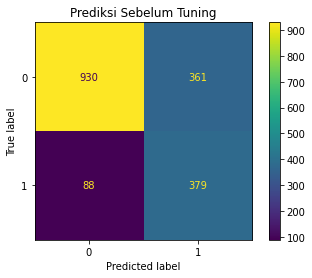

In [37]:
plot_confusion_matrix(lg_default,x_test,y_test)
plt.title('Prediksi Sebelum Tuning')

In [38]:
print("Pelanggan yang Benar Terprediksi Churn (TP) :", round(379/(379+361)*100,2),"%")
print("Pelanggan yang Benar Terprediksi Not Churn (TN) :", round(930/(930+88)*100,2),"%")

print("Pelanggan Terprediksi Churn tetapi Not Churn (FP) :", round(361/(361+379)*100,2),"%")
print("Pelanggan Terprediksi Not Churn tetapi Churn (FN) :", round(88/(930+88)*100,2),"%")

Pelanggan yang Benar Terprediksi Churn (TP) : 51.22 %
Pelanggan yang Benar Terprediksi Not Churn (TN) : 91.36 %
Pelanggan Terprediksi Churn tetapi Not Churn (FP) : 48.78 %
Pelanggan Terprediksi Not Churn tetapi Churn (FN) : 8.64 %


In [51]:
lg_tuned = logreg_gridsearch.best_estimator_.fit(x_train,y_train)
y_pred_lg_tuned = lg_tuned.predict(x_test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 9 12 15 18 21 24 27 30 33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [52]:
print(classification_report(y_test, y_pred_lg_tuned))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1291
           1       0.51      0.80      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



Text(0.5, 1.0, 'Prediksi Setelah Tuning')

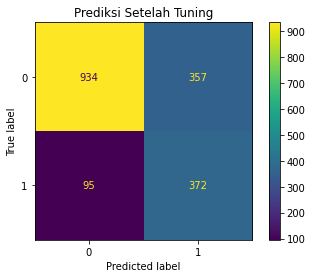

In [53]:
plot_confusion_matrix(lg_tuned,x_test,y_test)
plt.title('Prediksi Setelah Tuning')

In [42]:
print("Pelanggan yang Benar Terprediksi Churn (TP) :", round(372/(372+357)*100,2),"%")
print("Pelanggan yang Benar Terprediksi Not Churn (TN) :", round(934/(934+95)*100,2),"%")

print("Pelanggan Terprediksi Churn tetapi Not Churn (FP) :", round(357/(372+357)*100,2),"%")
print("Pelanggan Terprediksi Not Churn tetapi Churn (FN) :", round(95/(934+95)*100,2),"%")

Pelanggan yang Benar Terprediksi Churn (TP) : 51.03 %
Pelanggan yang Benar Terprediksi Not Churn (TN) : 90.77 %
Pelanggan Terprediksi Churn tetapi Not Churn (FP) : 48.97 %
Pelanggan Terprediksi Not Churn tetapi Churn (FN) : 9.23 %


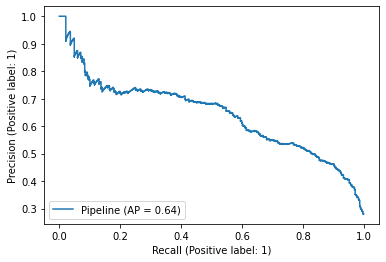

In [59]:
plot_precision_recall_curve(logreg_pipe_all, x_test, y_test)


# Prediction on Dataset

Selanjutnya, kita dapat fokus pada pelanggan belum beralih (Churn = 0) yang kemungkinan akan beralih dengan melihat probabilitasnya, sehingga dapat dilakukan penanganan tertentu untuk menghindari perilaku churn tersebut

In [155]:
predict = pd.DataFrame()
predict['Prediction'] = logreg_pipe_all.predict_proba(x_test)[:,1]
predict['Churn'] = df['Churn']
predict['CustomerID'] = df['CustomerID']

In [164]:
print('Mean predict proba of churn:',round(predict[predict['Churn'] == 1]['Prediction'].mean(),4))
print('Mean predict proba of NON-churn:',round(predict[predict['Churn'] == 0]['Prediction'].mean(),4))

Mean predict proba of churn: 0.4025
Mean predict proba of NON-churn: 0.4233


In [177]:
predict[predict['Churn'] == 0]

,Prediction,Churn,CustomerID
0,0.811640,0,7590-VHVEG
1,0.806372,0,5575-GNVDE
3,0.915785,0,7795-CFOCW
6,0.045839,0,1452-KIOVK
7,0.082764,0,6713-OKOMC
...,...,...,...
1753,0.702883,0,5848-FHRFC
1754,0.078958,0,2243-FNMMI
1755,0.643737,0,2511-MORQY
1756,0.190900,0,5356-KZCKT


# Final Conclusion

- Model klasifikasi yang dipilih adalah _Logistic Regression_, hal ini berdasarkan pertimbangan dari hasil _recall_, kecepatan performa dan kestabilan model _Logistic Regression_ yang lebih baik dari model lainnya , saya menggunakan model _Logistic Regression_ tanpa tuning dikarenakan performa yang lebih baik yakni sebesar 80% dibandingkan setelah tuning yang menurun menjadi 79%

- Berdasarkan korelasi variabel numerik, dapat dilihat fitur _Monthly Charges_ cukup berpengaruh terhadap _Churn_, artinya besaran biaya bulanan pelanggan cukup mempengaruhi pelanggan untuk beralih, sehingga harus diperhatikan besaran biaya dengan kemampuan keuangan setiap pelanggan untuk menghidari pelanggan beralih

- Pada _Confusion Matrix_ , model _Machine Learning_ yang dikembangkan dapat meminimalisir kesalahan prediksi pelanggan _Not Churn_ tetapi sebenarnya _Churn_ (FN) yang hanya sebesar 8,64%, artinya dari 100 pelanggan yang diteliti, hanya ada 9 pelanggan yang salah prediksi atau pelanggan yang beralih dan tidak mendapatkan pelakuan tertentu, hal ini menjadi fokus karena pada penelitian ini saya mengutamakan penurunan _False Negatif Rate_, karena berbahaya jika perusahaan tidak melakukan perlakuan tertentu terhadap pelanggan yang ingin beralih hanya karena salah prediksi 

- Namun disini juga harus diperhatikan bahwa _False Positive Rate_ yang tinggi yakni sebesar 48,97%, artinya dari 100 pelanggan yang diteliti, terdapat 49 pelanggan yang mendapat pelakuan tertentu yang sebenarnya tidak perlu dikarenakan pelanggan tersebut sebenarnya tidak berpotensi untuk beralih, hal ini jika berlanjut dapat menjadi sumber kerugian perusahaan

- Di akhir, saya membuat prediksi pada dataset berdasarkan _test set_ dengan memberikan probabilitas pada setiap kelas, untuk memetakan pelanggan mana saja yang bertahan namun memiliki potensi untuk _Churn_, dengan melihat rata" nilai probabilitas _Non Churn_ yang mana jika pelanggan (_churn_ = 0) dengan nilai probabilitas < 0,4233, artinya memiliki indikasi untuk beralih. Pemetaan ini juga menjadi wujud supaya hasil penelitian ini dapat langsung diaplikasikan pada produk yang membutuhkan dan dapat meningkatkan akurasi prediksi.